### Removing Outliers of clean_dataset which was remaining.

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [170]:
# Load the dataset
file_path = "diabetes_data1.csv"  # Replace with actual file path
df = pd.read_csv(file_path)

In [172]:
df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class,BMI_Category,Glucose_Category
0,6.0,148.0,72.0,35.000000,4.838924,33.6,0.627,50.0,1.0,Obese,Moderate
1,1.0,85.0,66.0,29.000000,4.214594,26.6,0.351,31.0,0.0,Overweight,Good
2,8.0,183.0,64.0,30.000000,5.278115,23.3,0.672,32.0,1.0,Normal,Action Suggested
3,1.0,89.0,66.0,23.000000,4.553877,28.1,0.167,21.0,0.0,Overweight,Good
4,5.0,116.0,74.0,18.333333,4.700480,25.6,0.201,30.0,0.0,Overweight,Moderate


In [174]:
print("Initial dataset info:")
print(df.info())

Initial dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           667 non-null    float64
 1   Glucose            667 non-null    float64
 2   Diastolic_BP       667 non-null    float64
 3   Skin_Fold          667 non-null    float64
 4   Serum_Insulin      667 non-null    float64
 5   BMI                667 non-null    float64
 6   Diabetes_Pedigree  667 non-null    float64
 7   Age                667 non-null    float64
 8   Class              667 non-null    float64
 9   BMI_Category       667 non-null    object 
 10  Glucose_Category   667 non-null    object 
dtypes: float64(9), object(2)
memory usage: 57.4+ KB
None


In [176]:
print("\nMissing values before handling:")
print(df.isnull().sum())


Missing values before handling:
Pregnant             0
Glucose              0
Diastolic_BP         0
Skin_Fold            0
Serum_Insulin        0
BMI                  0
Diabetes_Pedigree    0
Age                  0
Class                0
BMI_Category         0
Glucose_Category     0
dtype: int64


In [178]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

In [180]:
df[numerical_columns].describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,3.760120,118.405797,71.737131,28.546727,4.778998,31.892054,0.424396,32.208396,0.316342
std,3.244681,28.709385,10.902204,8.980697,0.559290,6.266962,0.245246,10.592367,0.465397
min,0.000000,44.000000,44.000000,7.000000,2.772589,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,4.382027,27.400000,0.237500,24.000000,0.000000
50%,3.000000,114.000000,72.000000,29.000000,4.844187,32.000000,0.352000,29.000000,0.000000
75%,6.000000,136.000000,80.000000,35.000000,5.175207,35.900000,0.583000,39.000000,1.000000
max,13.000000,198.000000,104.000000,54.000000,5.859836,48.300000,1.162000,64.000000,1.000000


In [182]:
# Store initial row count
initial_row_count = df.shape[0]
df_cleaned = df.copy() #df_cleaned = df.copy() creates a separate copy of the original df. This ensures that any changes (e.g., removing outliers, scaling) do not modify the original dataset.

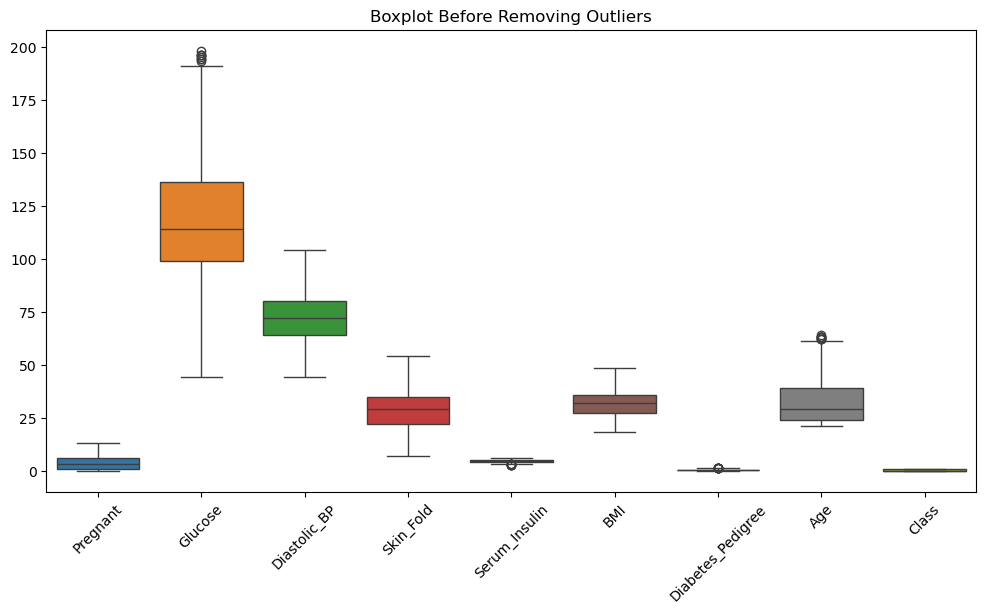

In [184]:
# Plot boxplot before removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=45)
plt.title("Boxplot Before Removing Outliers")
plt.show()

In [186]:
# Iterative outlier removal with safeguard
max_iterations = 10  # Prevent infinite loop
iteration = 0
while iteration < max_iterations:
    Q1 = df_cleaned[numerical_columns].quantile(0.25)
    Q3 = df_cleaned[numerical_columns].quantile(0.75)
    IQR = Q3 - Q1
    outlier_mask = ((df_cleaned[numerical_columns] < (Q1 - 1.5 * IQR)) | (df_cleaned[numerical_columns] > (Q3 + 1.5 * IQR)))
    # low → Outliers. Q1 - 1.5 * IQR
    # Q3 + 1.5 * IQR are too high → Outliers
    new_df = df_cleaned[~outlier_mask.any(axis=1)] #create a new dataframe with outliers removed.
    if new_df.shape[0] == df_cleaned.shape[0]:
        break  # Stop when no more outliers are detected
    df_cleaned = new_df
    iteration += 1

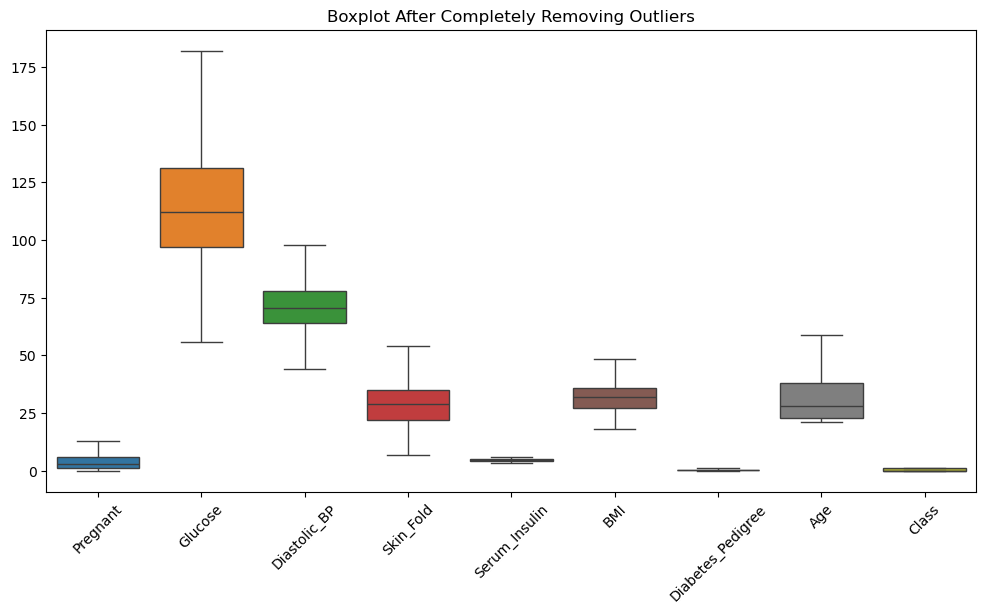

In [188]:
# Plot boxplot after completely removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[numerical_columns])
plt.xticks(rotation=45)
plt.title("Boxplot After Completely Removing Outliers")
plt.show()

### Normalizing the numerical data in between 0 and 1.

In [191]:
# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
df_cleaned.loc[:, numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])
#  transforms all values into a fixed range (default is 0 to 1)

In [193]:
df_cleaned[numerical_columns].describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
mean,0.285388,0.475698,0.504322,0.457686,0.553079,0.450448,0.350304,0.268057,0.294893
std,0.250782,0.204573,0.197246,0.191891,0.210823,0.205732,0.239862,0.252471,0.456371
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076923,0.325397,0.370370,0.319149,0.398083,0.302326,0.167373,0.052632,0.000000
50%,0.230769,0.444444,0.493827,0.468085,0.570569,0.455150,0.281780,0.184211,0.000000
75%,0.461538,0.595238,0.629630,0.595745,0.703113,0.581395,0.510064,0.447368,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [195]:
df_cleaned.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class,BMI_Category,Glucose_Category
0,0.461538,0.730159,0.518519,0.595745,0.584765,0.511628,0.581568,0.763158,1.0,Obese,Moderate
1,0.076923,0.230159,0.407407,0.468085,0.330832,0.279070,0.289195,0.263158,0.0,Overweight,Good
3,0.076923,0.261905,0.407407,0.340426,0.468828,0.328904,0.094280,0.000000,0.0,Overweight,Good
4,0.384615,0.476190,0.555556,0.241135,0.528456,0.245847,0.130297,0.236842,0.0,Overweight,Moderate
5,0.230769,0.174603,0.111111,0.531915,0.442293,0.425249,0.180085,0.131579,1.0,Obese,Excellent


In [197]:
print(f"Initial dataset entries: {initial_row_count}")
print(f"Remaining entries after outlier removal: {df_cleaned.shape[0]}")

Initial dataset entries: 667
Remaining entries after outlier removal: 607


In [199]:
# Save the cleaned and normalized dataset
df_cleaned.to_csv("cleaned_normalized_data.csv", index=False)
print("Data normalization complete. Cleaned dataset saved as cleaned_normalized_data.csv")

Data normalization complete. Cleaned dataset saved as cleaned_normalized_data.csv


In [203]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply Label Encoding
le = LabelEncoder() #LabelEncoder() converts each unique text value into a number. It assigns a unique integer to each category.
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])  # Convert text to numbers

X.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,BMI_Category,Glucose_Category
0,0.461538,0.730159,0.518519,0.595745,0.584765,0.511628,0.581568,0.763158,1,4
1,0.076923,0.230159,0.407407,0.468085,0.330832,0.279070,0.289195,0.263158,2,2
3,0.076923,0.261905,0.407407,0.340426,0.468828,0.328904,0.094280,0.000000,2,2
4,0.384615,0.476190,0.555556,0.241135,0.528456,0.245847,0.130297,0.236842,2,4
5,0.230769,0.174603,0.111111,0.531915,0.442293,0.425249,0.180085,0.131579,1,1


In [213]:
# Splitting dataset into training and testing sets  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# Training Logistic Regression model  
model = LogisticRegression(max_iter=1000)  
model.fit(X_train, y_train)  

# Making predictions and calculating accuracy  
y_pred = model.predict(X_test)  
accuracy = accuracy_score(y_test, y_pred)  
print(f'Accuracy: {accuracy:.2f}')  


Accuracy: 0.80
